In [2]:
! pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 92% 150M/163M [00:00<00:00, 192MB/s]
100% 163M/163M [00:00<00:00, 197MB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [6]:
!ls

data  face-mask-dataset.zip  sample_data


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files =os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:0])

['with_mask_1800.jpg', 'with_mask_2605.jpg', 'with_mask_1023.jpg', 'with_mask_663.jpg', 'with_mask_304.jpg']
[]


In [9]:
without_mask_files =os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:0])

['without_mask_952.jpg', 'without_mask_2812.jpg', 'without_mask_1774.jpg', 'without_mask_2438.jpg', 'without_mask_1667.jpg']
[]


In [10]:
print('number of with mask images',len(with_mask_files))
print('number of without mask images',len(without_mask_files))

number of with mask images 3725
number of without mask images 3828


#creating labels for the two class of images

with mask --->1
without mask--->0


In [11]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

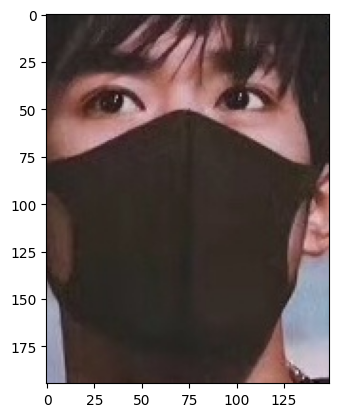

In [15]:
#diplaying with mask images

img = mpimg.imread('/content/data/with_mask/with_mask_1500.jpg')
imgplot = plt.imshow(img)
plt.show()

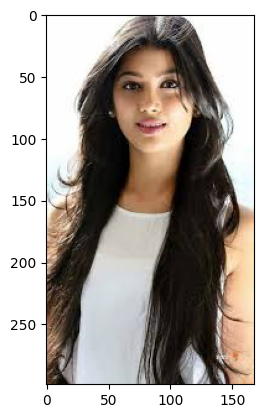

In [16]:
img = mpimg.imread('/content/data/without_mask/without_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

**bold text**

**image processing**
1.Resize the images
2.Convert the images to numpy arrays

In [17]:
with_mask_path='/content/data/with_mask/'
data =[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  data.append(np.array(image))

without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  data.append(np.array(image))

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
len(data)
type(data)

list

In [19]:
len(data)

7553

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
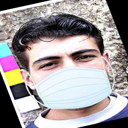

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

**converting image list and label list to numpy arrays**

In [23]:
X=np.array(data)
Y=np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

array([[[228, 227, 223],
        [222, 221, 217],
        [223, 222, 218],
        ...,
        [134, 120, 113],
        [215, 209, 206],
        [209, 209, 212]],

       [[228, 227, 223],
        [222, 221, 217],
        [223, 222, 218],
        ...,
        [134, 120, 112],
        [209, 201, 198],
        [219, 218, 220]],

       [[229, 228, 224],
        [223, 222, 218],
        [224, 223, 219],
        ...,
        [121, 107,  99],
        [150, 141, 137],
        [152, 148, 148]],

       ...,

       [[214, 208, 210],
        [218, 212, 214],
        [222, 216, 218],
        ...,
        [ 18,  18,  20],
        [ 21,  21,  23],
        [ 26,  26,  28]],

       [[217, 211, 213],
        [219, 213, 215],
        [221, 215, 217],
        ...,
        [ 16,  16,  18],
        [ 20,  20,  22],
        [ 27,  27,  29]],

       [[218, 212, 214],
        [220, 214, 216],
        [221, 215, 217],
        ...,
        [ 16,  16,  18],
        [ 20,  20,  22],
        [ 27,  27,  29]]], dtype=uint8)
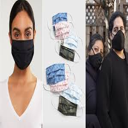

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.89411765, 0.89019608, 0.8745098 ],
        [0.87058824, 0.86666667, 0.85098039],
        [0.8745098 , 0.87058824, 0.85490196],
        ...,
        [0.5254902 , 0.47058824, 0.44313725],
        [0.84313725, 0.81960784, 0.80784314],
        [0.81960784, 0.81960784, 0.83137255]],

       [[0.89411765, 0.89019608, 0.8745098 ],
        [0.87058824, 0.86666667, 0.85098039],
        [0.8745098 , 0.87058824, 0.85490196],
        ...,
        [0.5254902 , 0.47058824, 0.43921569],
        [0.81960784, 0.78823529, 0.77647059],
        [0.85882353, 0.85490196, 0.8627451 ]],

       [[0.89803922, 0.89411765, 0.87843137],
        [0.8745098 , 0.87058824, 0.85490196],
        [0.87843137, 0.8745098 , 0.85882353],
        ...,
        [0.4745098 , 0.41960784, 0.38823529],
        [0.58823529, 0.55294118, 0.5372549 ],
        [0.59607843, 0.58039216, 0.58039216]],

       ...,

       [[0.83921569, 0.81568627, 0.82352941],
        [0.85490196, 0.83137255, 0.83921569],
        [0.87058824, 0

**Building a Convolutional Neural networks(cnn)**

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [33]:
num_of_classes=2
model=keras.Sequential()

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [37]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=6)

Epoch 1/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.9474 - loss: 0.1387 - val_acc: 0.9107 - val_loss: 0.2749
Epoch 2/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9481 - loss: 0.1396 - val_acc: 0.9190 - val_loss: 0.2641
Epoch 3/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.9621 - loss: 0.0982 - val_acc: 0.9223 - val_loss: 0.3098
Epoch 4/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - acc: 0.9660 - loss: 0.0946 - val_acc: 0.9157 - val_loss: 0.3620
Epoch 5/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - acc: 0.9667 - loss: 0.0922 - val_acc: 0.9240 - val_loss: 0.3307
Epoch 6/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.9715 - loss: 0.0718 - val_acc: 0.9207 - val_loss: 0.3250


In [38]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.9282 - loss: 0.3111
Test Accuracy = 0.9172733426094055


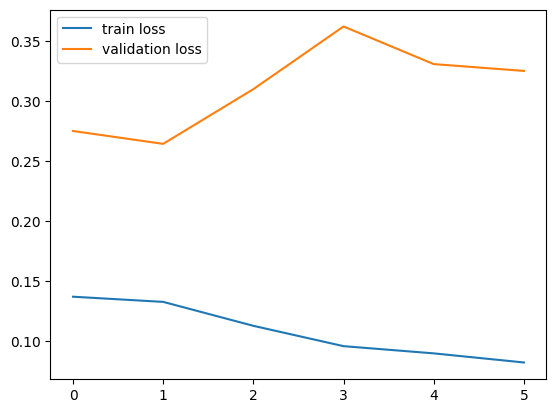

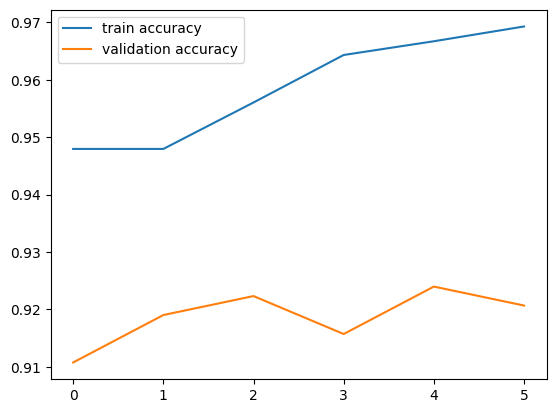

In [39]:
h= history
#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()


In [ ]:
input_image_path=input('enter the image path')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label==0:
  print('the person is wearing mask')
else:
  print('the person is not wearing mask')